In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [4]:
df = pd.read_csv("forestfires.csv")

In [5]:
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [7]:
# Convert categorical data (month and day) to numeric values
df['month'] = df['month'].astype('category').cat.codes
df['day'] = df['day'].astype('category').cat.codes


In [8]:
# Normalize fire area using log transformation (handling skewness)
df['log_area'] = df['area'].apply(lambda x: np.log(x + 1))

In [9]:
# Display dataset information
print("\nDataset Info After Preprocessing:")
df.info()



Dataset Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         517 non-null    int64  
 1   Y         517 non-null    int64  
 2   month     517 non-null    int8   
 3   day       517 non-null    int8   
 4   FFMC      517 non-null    float64
 5   DMC       517 non-null    float64
 6   DC        517 non-null    float64
 7   ISI       517 non-null    float64
 8   temp      517 non-null    float64
 9   RH        517 non-null    int64  
 10  wind      517 non-null    float64
 11  rain      517 non-null    float64
 12  area      517 non-null    float64
 13  log_area  517 non-null    float64
dtypes: float64(9), int64(3), int8(2)
memory usage: 49.6 KB


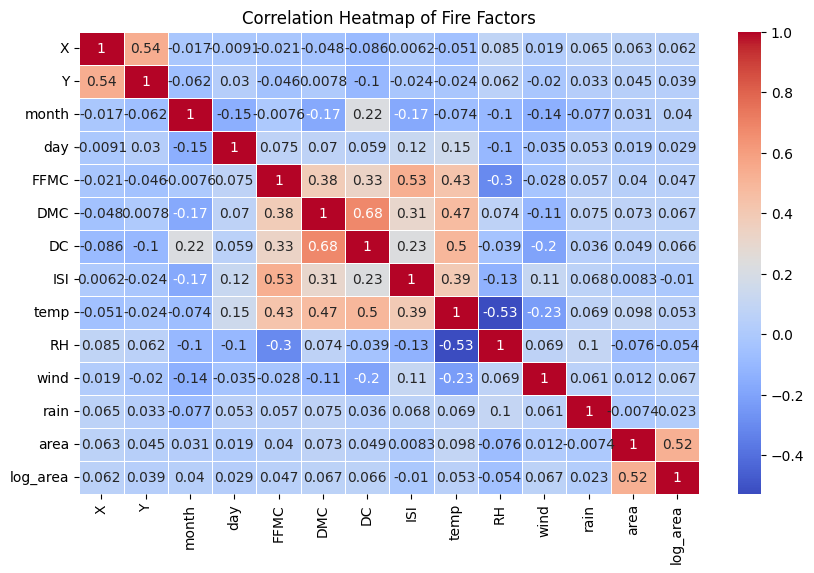

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Fire Factors")
plt.show()

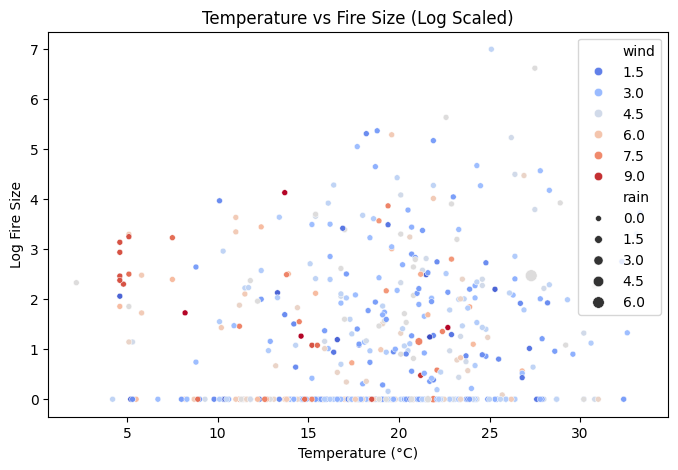

In [18]:
# Scatter Plot: Temperature vs Fire Size
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['temp'], y=df['log_area'], hue=df['wind'], size=df['rain'], palette="coolwarm")
plt.title("Temperature vs Fire Size (Log Scaled)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Log Fire Size")
plt.show()

In [29]:
# Geographical Fire Map
fire_map = folium.Map(location=[df["X"].mean(), df["Y"].mean()], zoom_start=6)

for index, row in df.iterrows():
    folium.CircleMarker(location=[row["X"], row["Y"]],
                        radius=row["log_area"]+1,
                        color='red', fill=True, fill_opacity=0.6).add_to(fire_map)

# Save map
fire_map.save("forest_fire_map.html")

print("\n✅ Analysis Complete! Open 'forest_fire_map.html' to see the map visualization.")



✅ Analysis Complete! Open 'forest_fire_map.html' to see the map visualization.


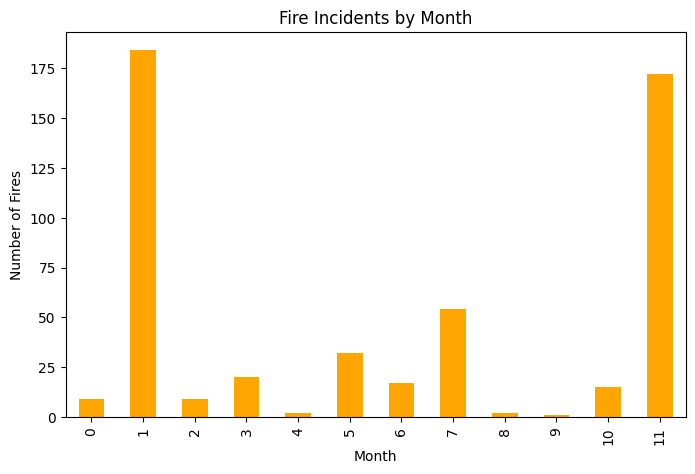

In [19]:
# Question 1: Which month has the highest number of fires?
fire_counts_by_month = df.groupby("month").size()
plt.figure(figsize=(8,5))
fire_counts_by_month.plot(kind='bar', color='orange')
plt.title("Fire Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.show()

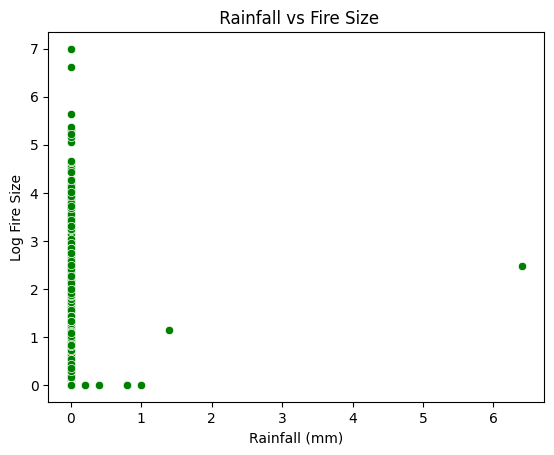

In [20]:
# Question 3: Is there any correlation between rainfall and fire size?
sns.scatterplot(x=df['rain'], y=df['log_area'], color='green')
plt.title(" Rainfall vs Fire Size")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Log Fire Size")
plt.show()

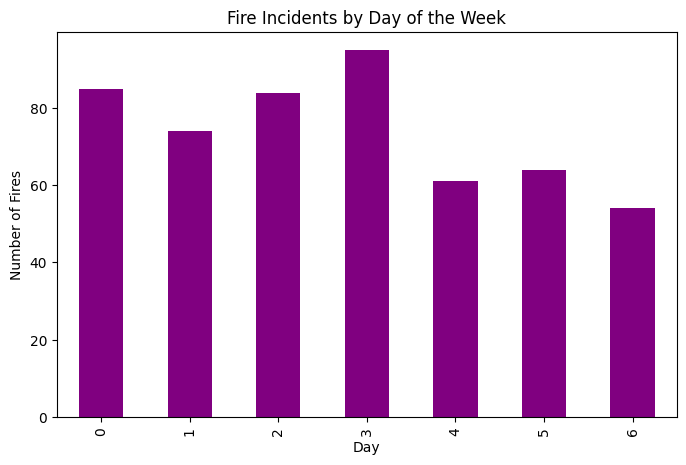

In [33]:
# Question 5: Which day of the week sees the most fire incidents?
fire_counts_by_day = df.groupby("day").size()
plt.figure(figsize=(8,5))
fire_counts_by_day.plot(kind='bar', color='purple')
plt.title("Fire Incidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Fires")
plt.show()

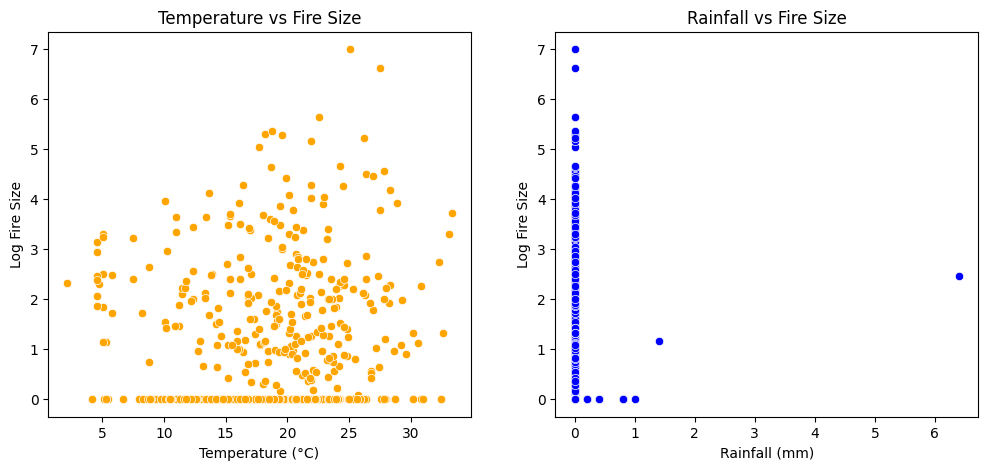

In [32]:
# Graph Comparison: Temperature vs Rainfall Impact on Fire Size
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['temp'], y=df['log_area'], color='orange')
plt.title("Temperature vs Fire Size")
plt.xlabel("Temperature (°C)")
plt.ylabel("Log Fire Size")

plt.subplot(1,2,2)
sns.scatterplot(x=df['rain'], y=df['log_area'], color='blue')
plt.title("Rainfall vs Fire Size")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Log Fire Size")
plt.show()

In [24]:
!pip install scikit-learn


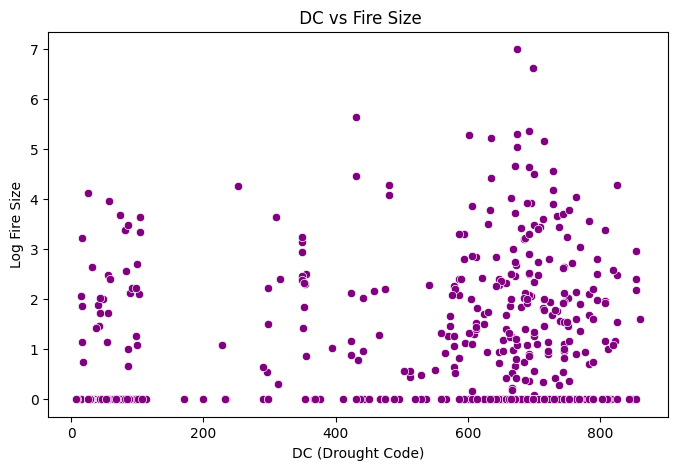

In [31]:
# Fire Count vs DC
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['DC'], y=df['log_area'], color='purple')
plt.title(" DC vs Fire Size")
plt.xlabel("DC (Drought Code)")
plt.ylabel("Log Fire Size")
plt.show()